# SWMT time series all models

In [1]:
import intake
import glob

import dask.distributed
import gsw
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)

## Time series

### Importing the data

In [3]:
pan01_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_anom.nc', chunks = 'auto') 
pan005_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_time_pan005_anom.nc', chunks = 'auto')
#acc_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_time_access_anom.nc', chunks = 'auto') 

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_time_pan005_anom.nc'

In [ ]:
pan01_anom_new = pan01_anom.to_series()
pan005_anom_new = pan005_anom.to_series()
#acc_anom_new = acc_anom.to_series()

### Plotting

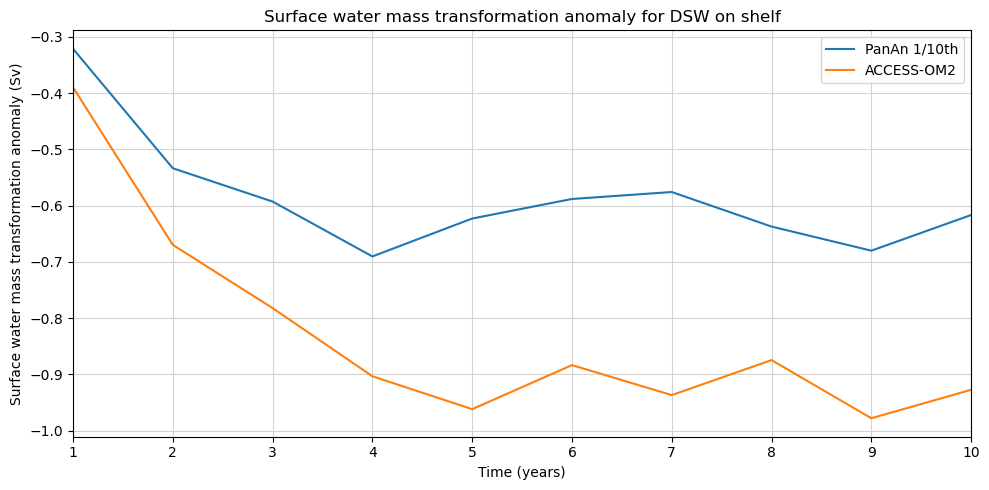

In [20]:
# Note, the '+1' is to make the data go from 1-10 instead of 0-9. 
plt.figure(figsize=(10, 5))
plt.plot(pan01_anom_new.index + 1, pan01_anom_new.values, label='PanAn 1/10th')
plt.plot(pan005_anom_new.index + 1, pan005_anom_new.values, label='PanAn 1/20th')
#plt.plot(acc_anom_new.index + 1, acc_anom_new.values, label='ACCESS-OM2')

# Labeling and formatting
plt.xlim(1, 10)
plt.xlabel('Time (years)')
plt.ylabel("Surface water mass transformation anomaly (Sv)")
plt.title('Surface water mass transformation anomaly for DSW on shelf')
plt.legend()
plt.grid(True, color='lightgrey')
plt.tight_layout()
plt.show()

## Isopycnal bins plot

In [21]:
pan01_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf/plots/swmt_shelf_sum_ave_C_pan01.nc', chunks = 'auto') 
pan01_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf/plots/swmt_shelf_sum_ave_M_pan01.nc', chunks = 'auto') 
#pan005_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/sic_shelf_anom_pan005.nc', chunks = 'auto') # update
#pan005_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/sic_shelf_anom_pan005_M.nc', chunks = 'auto') # update
acc_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_sum_ave_C_access.nc', chunks = 'auto') 
acc_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_sum_ave_M_access.nc', chunks = 'auto') 

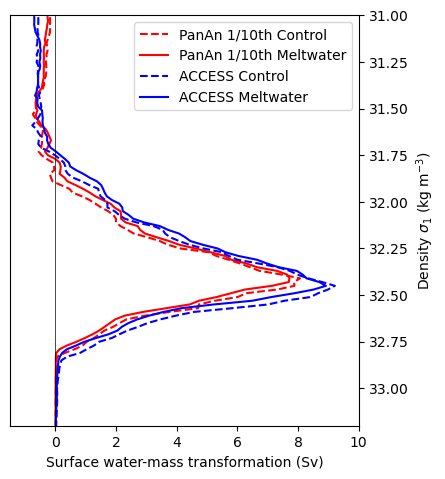

In [23]:
fig, ax1 = plt.subplots(figsize=(4.5, 5.33))

ax1.plot(pan01_C, pan01_C['isopycnal_bins'], '--r', label='PanAn 1/10th Control')
ax1.plot(pan01_M, pan01_M['isopycnal_bins'], 'r', label='PanAn 1/10th Meltwater')
ax1.plot(acc_C, acc_C['isopycnal_bins'], '--b', label='ACCESS Control')
ax1.plot(acc_M, acc_M['isopycnal_bins'], 'b', label='ACCESS Meltwater')
ax1.plot([0, 0], [31, 33.2], 'k', linewidth=0.5)
#ax1.plot([-5, 15], [cont_d25, cont_d25], 'k--', linewidth=1)
#ax1.plot([-5, 15], [cont_d75, cont_d75], 'k--', linewidth=1)
ax1.set_ylim((33.2, 31))
ax1.set_xlim((-1.5, 10))
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax1.set_ylabel('Density $\sigma_1$ (kg m$^{-3}$)')
ax1.set_xlabel('Surface water-mass transformation (Sv)')
ax1.legend();

Need to play around with best presentation a bit.